# **Air Pollution Data Analysis Project**

**Installing Libraries**

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import random

**Load Dataset**

In [3]:
df = pd.read_csv("global_air_quality_data.csv")
print(df.head(10))

             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   
5     Los Angeles       USA  2023-01-05  121.28  196.39  86.17  28.74  2.64   
6           Tokyo     Japan  2023-09-17  118.76   15.69  12.99  39.05  3.04   
7        New York       USA  2023-11-23   72.52   23.43  92.01  15.26  4.57   
8           Tokyo     Japan  2023-09-21  131.46  145.57  10.13  25.10  9.08   
9          London        UK  2023-09-13   64.71   92.84  92.98  36.40  3.68   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51    

**Data Cleaning & Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


**Convert Date Column**

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         10000 non-null  object        
 1   Country      10000 non-null  object        
 2   Date         10000 non-null  datetime64[ns]
 3   PM2.5        10000 non-null  float64       
 4   PM10         10000 non-null  float64       
 5   NO2          10000 non-null  float64       
 6   SO2          10000 non-null  float64       
 7   CO           10000 non-null  float64       
 8   O3           10000 non-null  float64       
 9   Temperature  10000 non-null  float64       
 10  Humidity     10000 non-null  float64       
 11  Wind Speed   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2023-06-29 00:28:56.640000,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
min,2023-01-01 00:00:00,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,2023-03-28 00:00:00,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,2023-06-27 00:00:00,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,2023-09-27 00:00:00,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,2023-12-28 00:00:00,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000
std,NaN,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628


In [8]:
check_duplicates = df.duplicated().sum()
print(check_duplicates)

0


In [53]:
df.drop_duplicates(inplace=True)

**Feature Engineering**

In [9]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Season"] = df["Month"] % 12 // 3 + 1
df["Season"] = df["Season"].replace({1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"})
df["WeekDay"] = df["Date"].dt.day_name()

**Rolling average**

In [10]:
df["PM2.5_Rolling_Average"] = df["PM2.5"].rolling(window=7, min_periods = 1).mean()

**Anomaly / Outlier detection**

In [11]:
df["PM2.5_zscore"] = (df["PM2.5"] - df["PM2.5"].mean()) / df["PM2.5"].std()
df["Outlier"] = df["PM2.5_zscore"].apply(lambda x: 1 if abs(x) > 3 else 0)

In [19]:
# Average pollution level by city
city_avg_pollution = df.groupby("City")[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].mean().sort_values(by = "PM2.5", ascending = False)
print(city_avg_pollution)

                    PM2.5        PM10        NO2        SO2        CO  \
City                                                                    
Dubai           80.013692  103.891192  52.683038  24.964096  5.084346   
Sydney          78.933560  103.373951  52.474938  25.684033  5.023477   
Mumbai          78.901167  105.841667  53.344074  25.029444  5.077556   
Tokyo           78.867475  105.040937  52.672770  27.978635  5.101446   
Mexico City     78.855054  104.526868  50.863650  26.022138  5.141339   
Beijing         78.627848  103.189877  51.621045  24.903258  5.093443   
Moscow          77.878610  105.936286  52.029876  26.110913  5.120996   
New York        77.857054  102.950538  51.001634  25.168903  4.987591   
Toronto         77.827645  103.867799  51.546834  24.802027  4.946544   
Istanbul        77.711220  103.140102  52.022439  25.769207  5.123171   
Johannesburg    77.666008  105.135125  53.146929  24.674261  5.093397   
London          77.614908  103.843804  52.334581  2

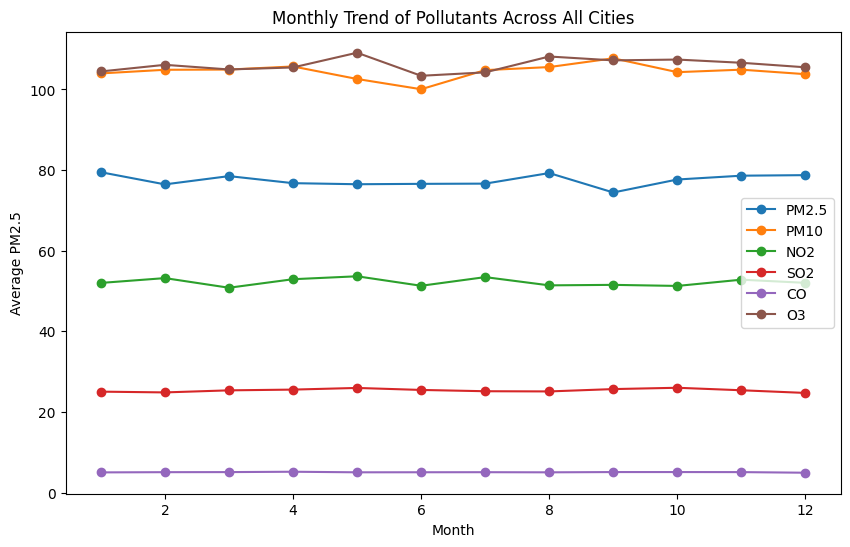

In [54]:
# Monthly Trend of Pollutants Across All Cities
monthly_trend = df.groupby("Month")[["PM2.5","PM10","NO2","SO2","CO","O3"]].mean()
monthly_trend.plot(kind = "line", figsize = (10,6), marker = "o", title = "Monthly Trend of Pollutants Across All Cities")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.show()

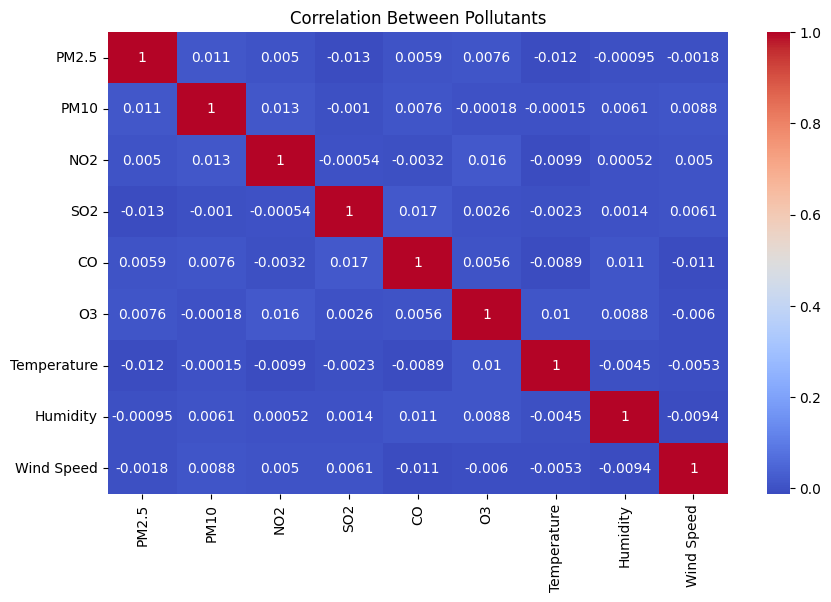

In [50]:
# Correlation between pollutants with Temperature
plt.figure(figsize = (10,6))
sns.heatmap(df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "Temperature", "Humidity",	"Wind Speed"]].corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

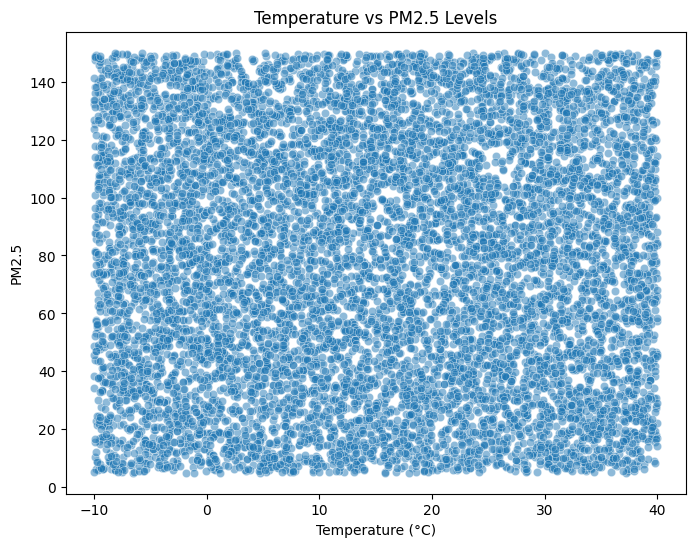

In [52]:
# Scatter Plot: Temperature vs PM2.5
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperature', y='PM2.5', data=df, alpha=0.5)
plt.title("Temperature vs PM2.5 Levels")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5")
plt.show()

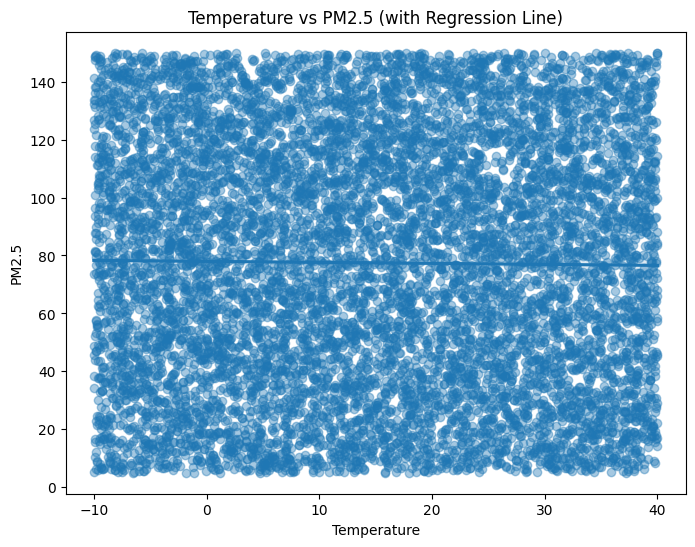

In [57]:
plt.figure(figsize=(8,6))
sns.regplot(x='Temperature', y='PM2.5', data=df, scatter_kws={'alpha':0.4})
plt.title("Temperature vs PM2.5 (with Regression Line)")
plt.show()

<Axes: title={'center': 'Top 5 Most Polluted Cities (Based on PM2.5)'}, xlabel='City'>

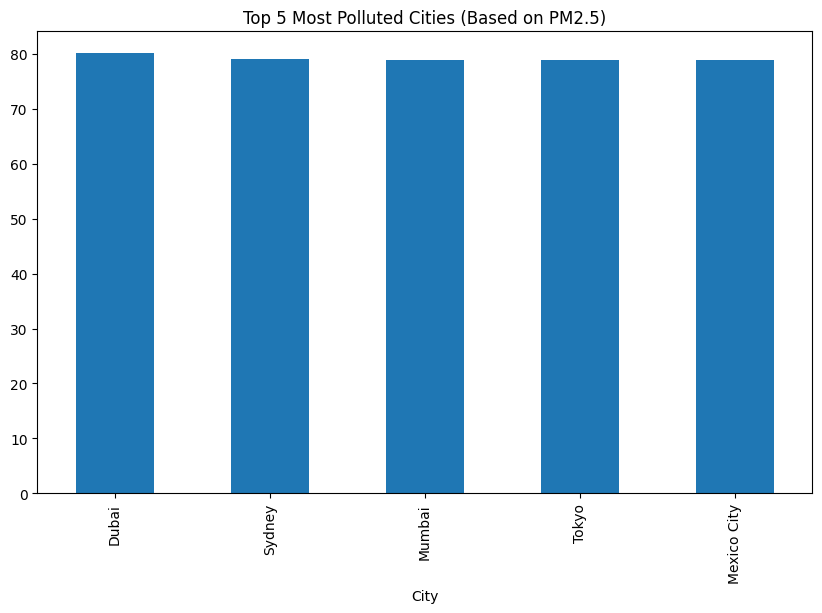

In [24]:
# Top 5 most polluted cities (based on PM2.5)
top_cities = df.groupby("City")["PM2.5"].mean().sort_values(ascending = False).head(5)
top_cities.plot(kind = "bar", figsize = (10,6), title = "Top 5 Most Polluted Cities (Based on PM2.5)")

<Axes: title={'center': 'Seasonal Effect on Pollution (Winter vs Summer)'}, xlabel='Season'>

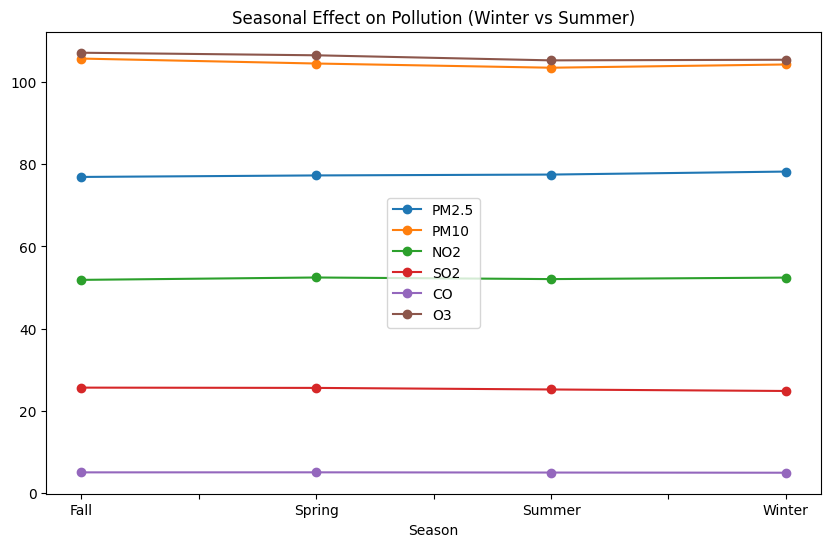

In [34]:
# Seasonal effect on pollution
seasonal_effect = df.groupby("Season")[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].mean()
seasonal_effect.plot(kind = "line", figsize = (10,6), marker = "o", title = "Seasonal Effect on Pollution (Winter vs Summer)")

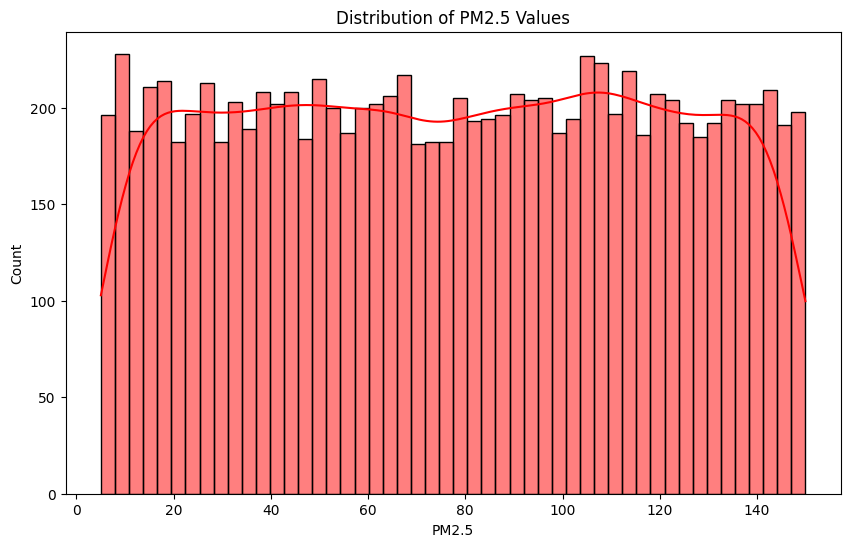

In [36]:
# Distribution of PM2.5 values
plt.figure(figsize = (10,6))
sns.histplot(df["PM2.5"], bins = 50, kde = True, color = "red")
plt.title("Distribution of PM2.5 Values")
plt.show()

In [37]:
# Worst day recorded for each city
worst_days = df.groupby("City")["PM2.5"].idxmax()
worst_days_df = df.loc[worst_days, ["City", "Date", "PM2.5"]]
print(worst_days_df.head())

         City       Date   PM2.5
6317  Bangkok 2023-01-07  149.86
6605  Beijing 2023-02-03  149.98
5260   Berlin 2023-03-25  149.90
5138    Cairo 2023-06-08  149.41
9674    Dubai 2023-06-03  149.96


In [38]:
#  Air Quality Index (AQI) Estimation
df["aqi"] = df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].mean(axis = 1)
city_aqi = df.groupby("City")["aqi"].mean().sort_values(ascending = False)
print(city_aqi.head(10))

City
Tokyo             63.023459
Mumbai            62.472926
Moscow            62.395149
Toronto           62.306869
Dubai             62.172006
Sydney            62.051399
Los Angeles       61.986214
Johannesburg      61.983103
Mexico City       61.849222
Rio de Janeiro    61.794790
Name: aqi, dtype: float64


In [39]:
# Best city (least polluted overall)
best_city = city_aqi.idxmin()
print("Best City:", best_city)

Best City: Bangkok


In [61]:
print("\n===== AUTO INSIGHTS =====")

# 1. Overall mean PM2.5
overall_mean = df["PM2.5"].mean()
print(f"Overall mean PM2.5: {overall_mean:.2f}")

# 2. Monthly variation
monthly_means = df.groupby("Month")["PM2.5"].mean()
monthly_min = monthly_means.min()
monthly_max = monthly_means.max()
variation_range = monthly_max - monthly_min
rel_range_pct = (variation_range / overall_mean) * 100

print(f"Monthly min PM2.5: {monthly_min:.2f}, max: {monthly_max:.2f}, "
      f"range: {variation_range:.2f} ({rel_range_pct:.1f}% of mean)")

# 3. Temperature correlation with PM2.5
if "Temperature" in df.columns:
    corr = df["PM2.5"].corr(df["Temperature"])
    print(f"Temperature vs PM2.5 correlation: {corr:.3f}")
else:
    print("Temperature column not found!")

# 4. WHO exceedance check
who_limit = 25
exceed_days = (df["PM2.5"] > who_limit).mean() * 100
print(f"Days exceeding WHO safe limit (25): {exceed_days:.1f}%")



===== AUTO INSIGHTS =====
Overall mean PM2.5: 77.45
Monthly min PM2.5: 74.44, max: 79.47, range: 5.03 (6.5% of mean)
Temperature vs PM2.5 correlation: -0.012
Days exceeding WHO safe limit (25): 86.0%
